In [18]:
# DEPENDENCIES ------>
import os
import pickle
import mediapipe as mp
import cv2
from matplotlib import pyplot as plt 
plt.style.use('default')


In [3]:
import tensorflow as tf

tf.version.VERSION

'2.16.1'

In [4]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)
data_dir = "./dataDir"
data = []
labels = []

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


In [8]:
%matplotlib inline

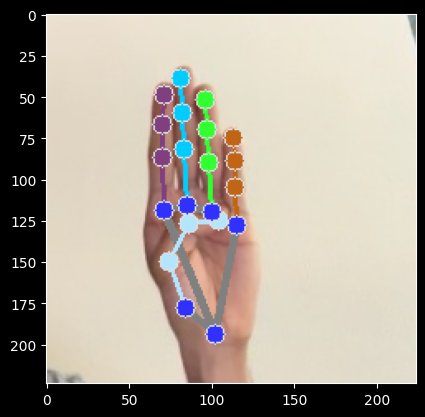

In [19]:
img = cv2.imread(os.path.join(data_dir, "1", "5.jpg"))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = hands.process(img_rgb)

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            img_rgb, 
            hand_landmarks, 
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style()
        )

#Show the image with matplotlib
plt.imshow(img_rgb)
plt.show()

In [5]:
for dir_ in os.listdir(data_dir):
    for img_path in os.listdir(os.path.join(data_dir, dir_)):
        data_aux = []
        img = cv2.imread(os.path.join(data_dir, dir_, img_path))
        if img is None:
            print(f"Error reading image: {os.path.join(data_dir, dir_, img_path)}")
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)



        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)
            data.append(data_aux)
            labels.append(dir_)
file = open("processed_data.pickle", "wb")
pickle.dump({"data": data, "labels": labels}, file)
file.close()


In [9]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


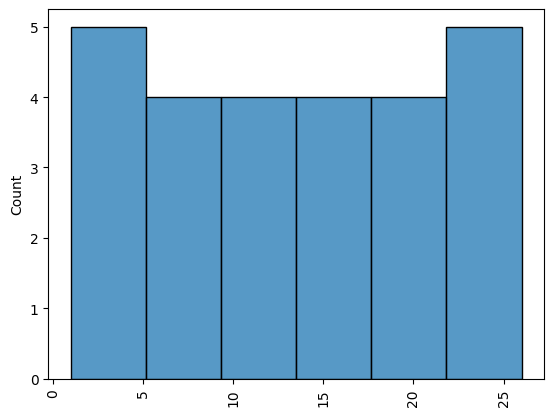

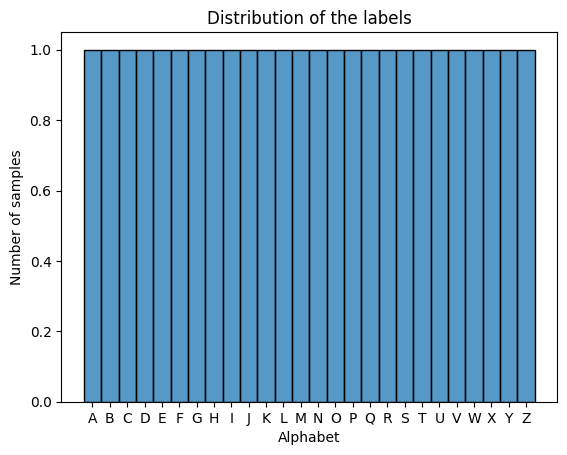

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

labels_alphabets = [
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", 
    "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"
]

# Assuming labels is a list of numbers from 1-26
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

# Map the numbers in labels to their corresponding alphabets
labels_mapped = [labels_alphabets[i-1] for i in labels]

sns.histplot(labels_mapped, kde=False)
plt.xlabel("Alphabet")
plt.ylabel("Number of samples")
plt.title("Distribution of the labels")
plt.show()

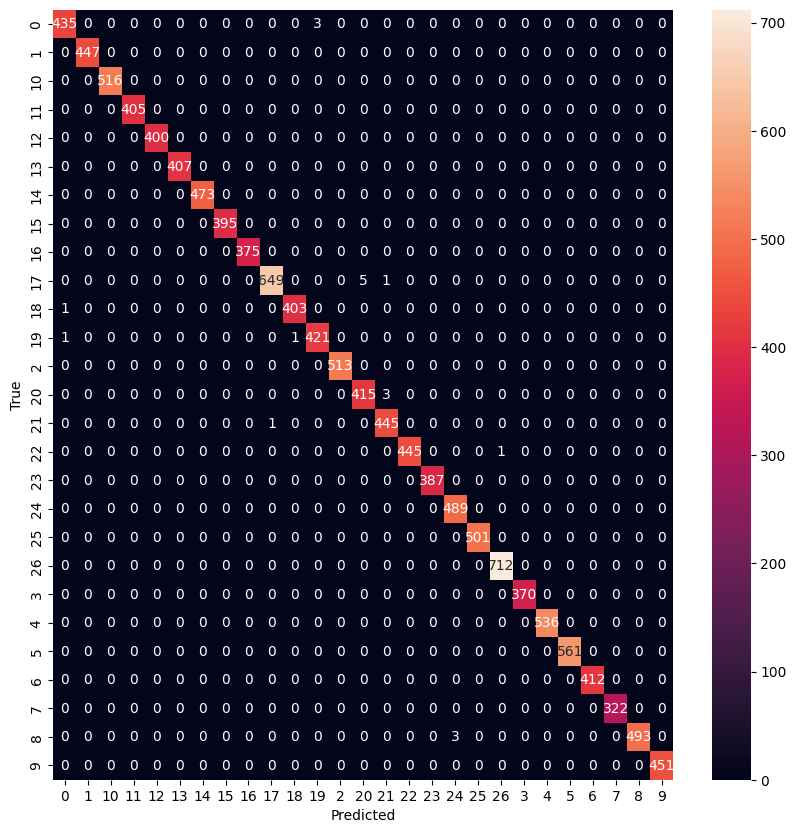

Accuracy: 0.9983868365865463


In [22]:
# plot the accuracy of the model
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the data
file = open("processed_data.pickle", "rb")
data = pickle.load(file)
file.close()

# Split the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data_dict = pickle.load(open("./processed_data.pickle", "rb"))
data = np.asarray(data_dict["data"])
labels = np.asarray(data_dict["labels"])
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, shuffle=True, stratify=labels
)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)


# Predict the test data
y_pred = model.predict(x_test)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(f"Accuracy: {score}")

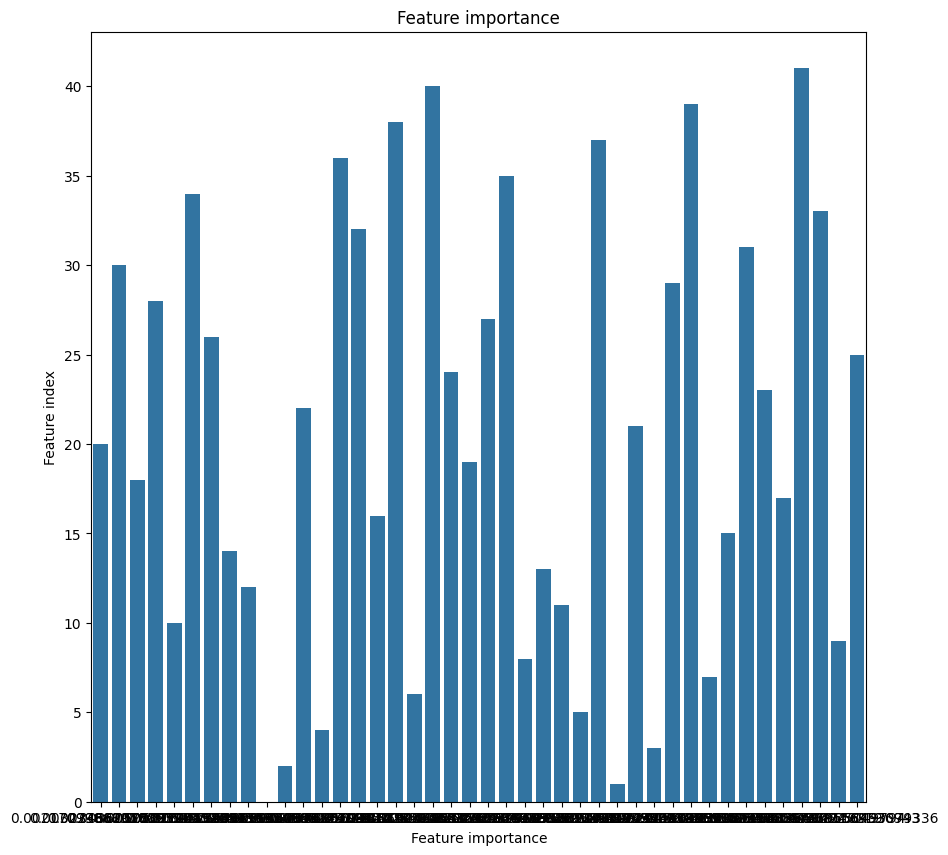

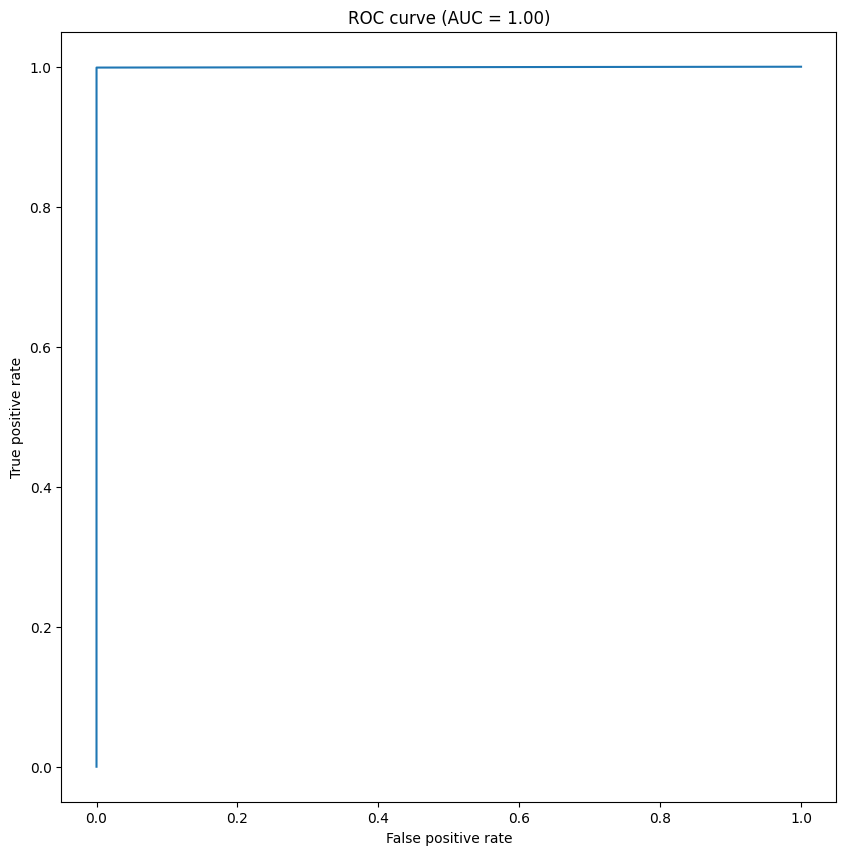

Accuracy: 0.9987901274399097


In [39]:
# plot the feature importance
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

 
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data_dict = pickle.load(open("./processed_data.pickle", "rb"))
data = np.asarray(data_dict["data"])
labels = np.asarray(data_dict["labels"])
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, shuffle=True, stratify=labels
)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)

# Plot the feature importance
plt.figure(figsize=(10, 10))
sns.barplot(x=model.feature_importances_, y=range(len(model.feature_importances_)))
plt.xlabel("Feature importance")
plt.ylabel("Feature index")
plt.title("Feature importance")
plt.show()

 
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)

# Plot the ROC curve

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_predict_bin = lb.transform(y_predict)
# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_predict_bin.ravel())
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_predict_bin)
# Plot the ROC curve
plt.figure(figsize=(10, 10))
sns.lineplot(x=fpr, y=tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title(f"ROC curve (AUC = {roc_auc:.2f})")
plt.show()
print(f"Accuracy: {score}")



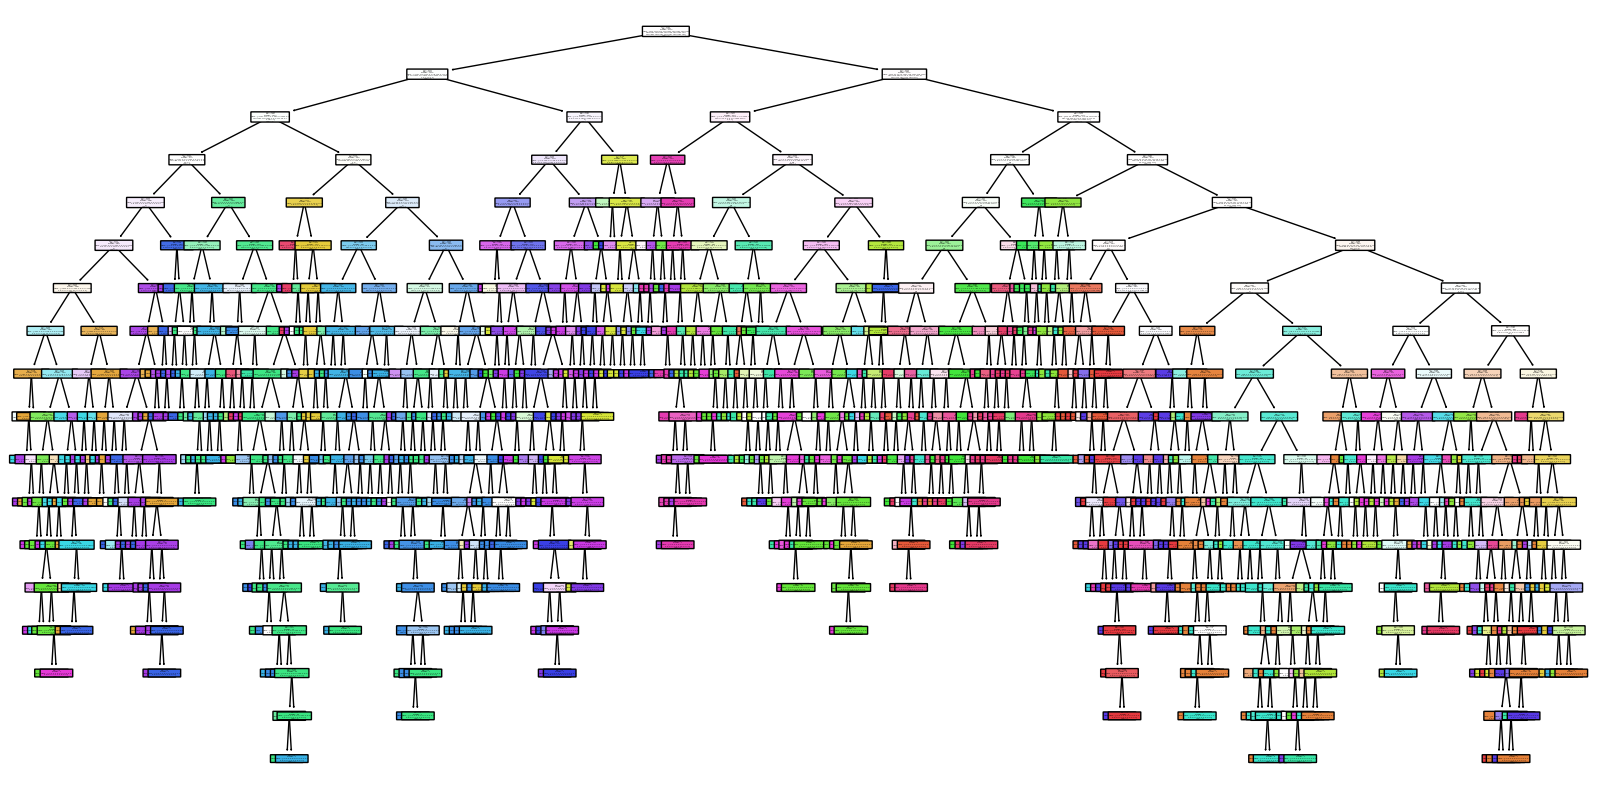

In [40]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

 

# Plot a single tree from the forest
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], 
          feature_names=range(len(model.feature_importances_)), 
          class_names=model.classes_, 
          filled=True, 
          impurity=True, 
          rounded=True)
plt.show()

In [2]:
import pickle
import cv2
import mediapipe as mp
import numpy as np

model_dict = pickle.load(open("./small_dataset.p", "rb"))
model = model_dict["model"]
capture = cv2.VideoCapture(0)
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=False, min_detection_confidence=0.9, min_tracking_confidence=0.9)

labels_dict = {0:"aA",1:"bB",2:"cC",3:"dD",4:"eE",5:"fF",6:"gG",7:"hH",8:"iI",9:"jJ",10:"kK",11:"lL",12:"mM",13:"nN",14:"oO",15:"pP",16:"qQ",17:"rR",18:"sS",19:"tT",20:"uU",21:"vV",22:"wW",23:"xX",24:"yY",25:"zZ",26:"Nothing"}
while True:
    data_aux = []
    x_ = []
    y_ = []
    ret, frame = capture.read()
    H, W, _ = frame.shape
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x)
                data_aux.append(y)
                x_.append(x)
                y_.append(y)
            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10
            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10
            prediction = model.predict([np.asarray(data_aux)])
            predicted_sign = labels_dict[int(prediction[0])]
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 2)
            cv2.putText(frame, predicted_sign, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 255), 3, cv2.LINE_AA)
            data_aux = []
            x_ = []
            y_ = []

    cv2.imshow("Handy", frame)
    cv2.waitKey(1)

KeyboardInterrupt: 

In [3]:
capture.release()
cv2.destroyAllWindows()

In [3]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

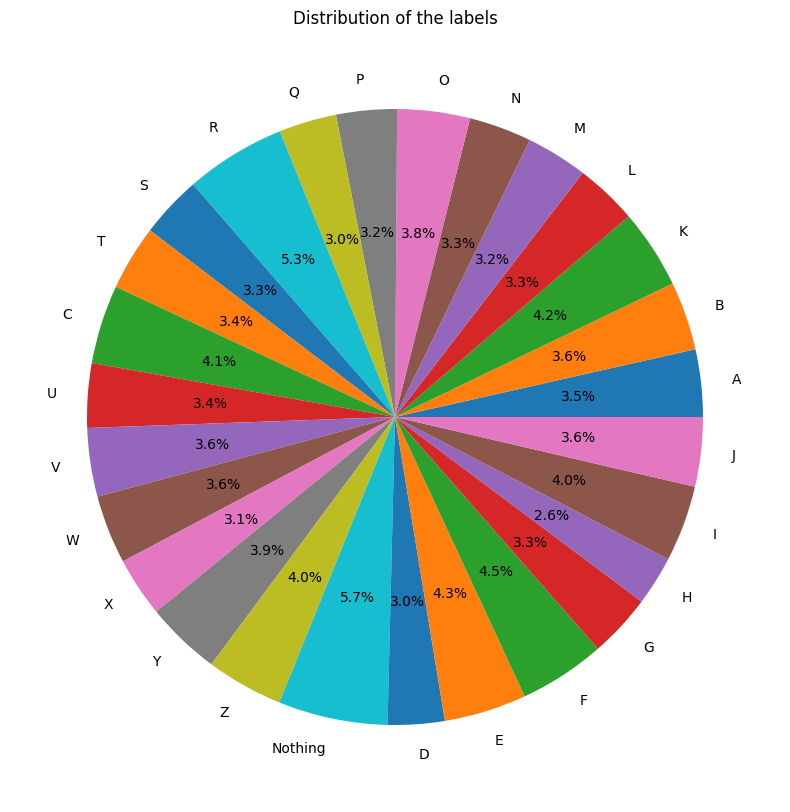

In [9]:
# plot a pie chart of the distribution of the labels
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('default')

import pickle

data_dict = pickle.load(open("./processed_data.pickle", "rb"))

labels = data_dict["labels"]

labels_dict ={0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z', 26:'Nothing'}

labels_unique, labels_count = np.unique(labels, return_counts=True)
labels_unique = [labels_dict[int(i)] for i in labels_unique]

plt.figure(figsize=(10, 10))
plt.pie(labels_count, labels=labels_unique, autopct="%1.1f%%")
plt.title("Distribution of the labels")
plt.show()



In [17]:
# function to draw landmarks on an image
import cv2
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def draw_landmarks(image):
    # also display boolean to sucess or failure
    success = False
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(img_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, 
                hand_landmarks, 
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )
            success = True
    return image, success

     

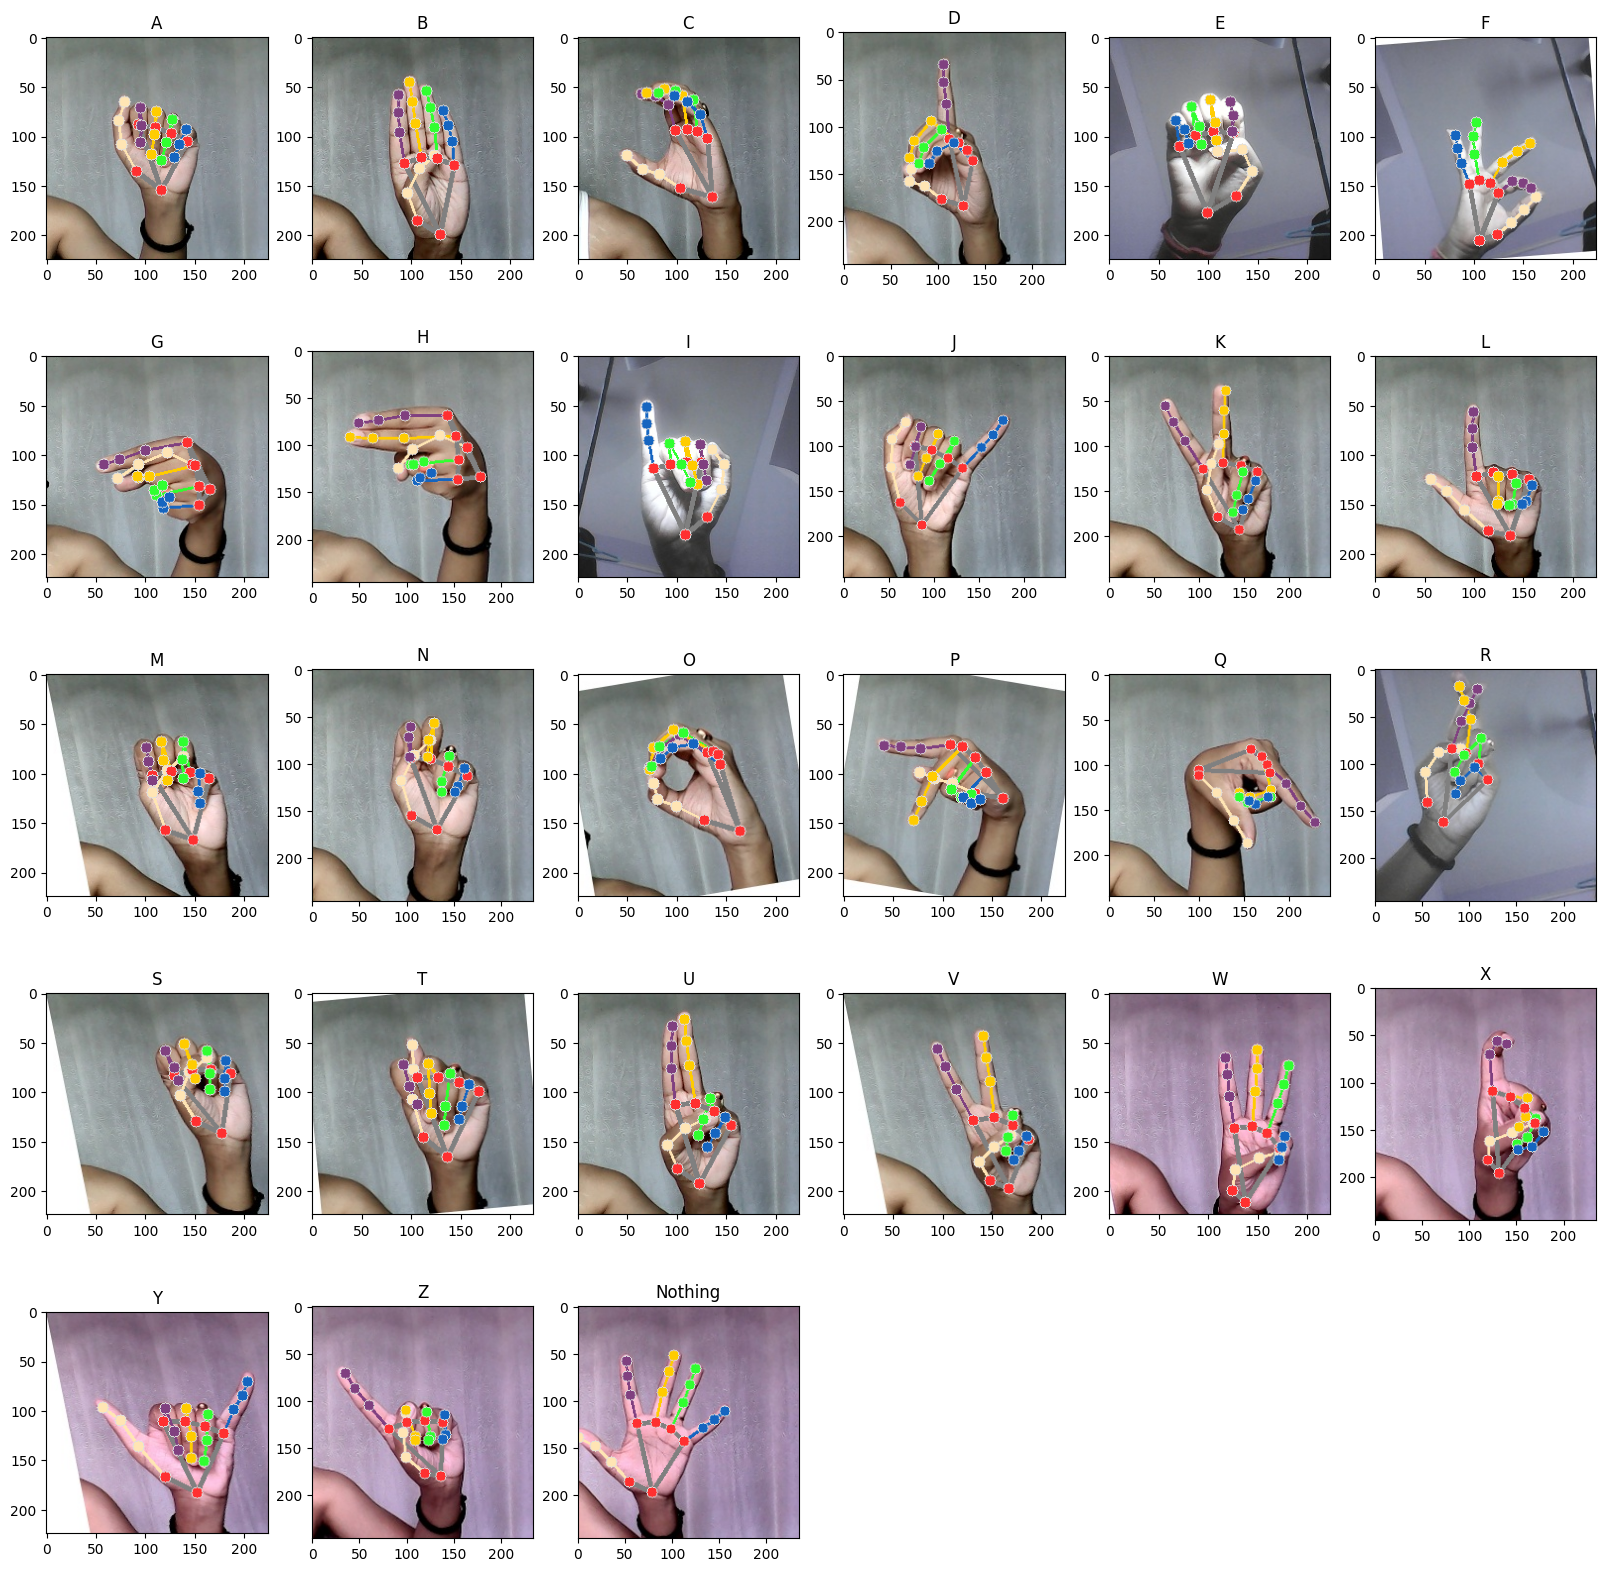

In [18]:
# show image from each of the classes from processed_data_dir on notebook

import os
import random
import cv2
import matplotlib.pyplot as plt

plt.style.use('default')

processed_data_dir = "./dataDir"

class_label_list = [
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", 
    "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing"
] 

fig, axs = plt.subplots(5, 6, figsize=(20, 20))

class_dirs = os.listdir(processed_data_dir)
for class_dir in class_dirs:
    class_dir_path = os.path.join(processed_data_dir, class_dir)
    img_files = os.listdir(class_dir_path)

    img_path = os.path.join(class_dir_path, random.choice(img_files))
    img = cv2.imread(img_path)

    img, success = draw_landmarks(img)
    # if not sucess iterate over the another image of same class 
    if not success:
        for img_file in img_files:
            img_path = os.path.join(class_dir_path, img_file)
            img = cv2.imread(img_path)
            img, success = draw_landmarks(img)
            if success:
                break

    axs[int(class_dir) // 6, int(class_dir) % 6].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[int(class_dir) // 6, int(class_dir) % 6].set_title(class_label_list[int(class_dir)])

for ax in axs.flat[len(class_dirs):]:
    ax.axis('off')